In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os
import seaborn as sns

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
dat='CATS_DOGS/'

In [0]:
!unzip -q "/content/drive/My Drive/CATS_DOGS.zip"

In [105]:
os.listdir(dat) 

['train', 'test']

In [0]:
test_path = dat+'/test/'
train_path = dat+'/train/'

In [0]:
os.listdir(test_path)

['CAT', 'DOG']

In [0]:
os.listdir(train_path)

['CAT', 'DOG']

In [0]:
cat = test_path+'CAT'+'/9380.jpg'

In [108]:
imread(para_cell)

array([[[ 14,  13,  11],
        [ 13,  12,  10],
        [ 11,  10,   8],
        ...,
        [ 82,  59,  41],
        [ 96,  73,  55],
        [ 73,  50,  32]],

       [[ 14,  13,  11],
        [ 13,  12,  10],
        [ 11,  10,   8],
        ...,
        [ 86,  65,  46],
        [ 94,  73,  54],
        [ 77,  56,  37]],

       [[ 14,  13,  11],
        [ 13,  12,  10],
        [ 11,  10,   8],
        ...,
        [ 79,  58,  39],
        [ 81,  60,  41],
        [ 72,  51,  32]],

       ...,

       [[ 21,  21,  21],
        [ 23,  23,  23],
        [ 34,  34,  34],
        ...,
        [189, 182, 164],
        [189, 182, 164],
        [189, 182, 164]],

       [[ 35,  35,  35],
        [ 37,  37,  37],
        [ 41,  41,  41],
        ...,
        [192, 185, 167],
        [192, 185, 167],
        [192, 185, 167]],

       [[ 40,  40,  40],
        [ 45,  45,  45],
        [ 46,  46,  46],
        ...,
        [192, 185, 167],
        [193, 186, 168],
        [193, 186, 168]]

In [0]:
para_img= imread(para_cell)

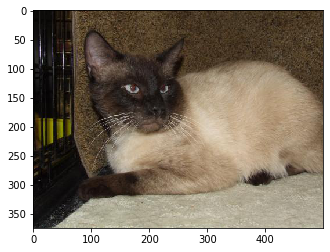

In [110]:
plt.imshow(para_img)

In [0]:
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'CAT'):
    
    img = imread(test_path+'CAT'+'/'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

3

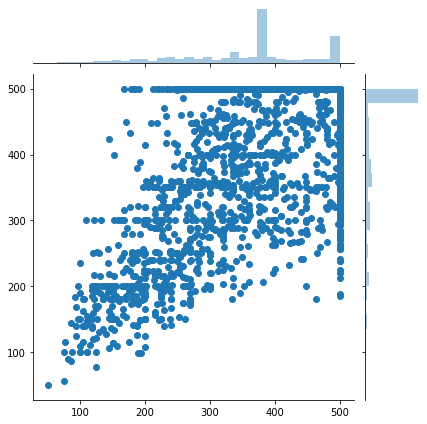

In [0]:
sns.jointplot(dim1,dim2)
colors

In [0]:
np.mean(d1)

500.0

In [0]:
image_shape = (224,224,3)

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
image_gen=ImageDataGenerator(featurewise_center=True,rotation_range=20,width_shift_range=0.1,height_shift_range=0.1,shear_range=0.1,zoom_range=0.1,horizontal_flip=True,fill_mode='nearest')
image_gen.mean = [123.68, 116.779, 103.939]

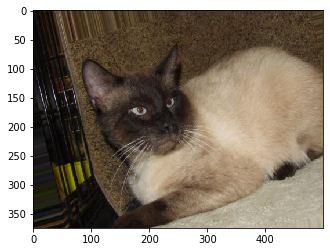

In [0]:
plt.imshow(image_gen.random_transform(para_img))

In [0]:
image_gen.flow_from_directory(train_path)

Found 18743 images belonging to 2 classes.


In [0]:
image_gen.flow_from_directory(test_path)

Found 6251 images belonging to 2 classes.


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten


In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
early_stop=EarlyStopping(monitor='val_loss',patience=20)

In [0]:
batch_size=16

In [144]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 18743 images belonging to 2 classes.


In [145]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',
                                              shuffle=False)

Found 6251 images belonging to 2 classes.


In [146]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [0]:
from tensorflow.keras.models import load_model

In [0]:
from tensorflow.keras.preprocessing import image

In [0]:

myimg=image.load_img(para_cell,target_size=(224,224,3))


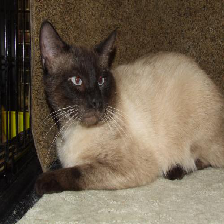

In [114]:
myimg

In [117]:
arr=image.img_to_array(myimg)
arr

array([[[ 13.,  12.,  10.],
        [ 11.,  10.,   8.],
        [ 13.,  12.,  10.],
        ...,
        [ 58.,  41.,  23.],
        [ 68.,  45.,  27.],
        [ 96.,  73.,  55.]],

       [[ 13.,  12.,  10.],
        [ 11.,  10.,   8.],
        [ 13.,  12.,  10.],
        ...,
        [ 66.,  49.,  31.],
        [ 90.,  69.,  50.],
        [ 81.,  60.,  41.]],

       [[ 13.,  12.,  10.],
        [ 11.,  10.,   8.],
        [ 13.,  12.,  10.],
        ...,
        [ 71.,  54.,  36.],
        [ 71.,  54.,  34.],
        [ 77.,  60.,  40.]],

       ...,

       [[ 23.,  23.,  23.],
        [ 22.,  22.,  22.],
        [ 19.,  19.,  19.],
        ...,
        [169., 166., 147.],
        [182., 175., 157.],
        [182., 175., 157.]],

       [[ 23.,  23.,  23.],
        [ 46.,  46.,  46.],
        [ 30.,  30.,  30.],
        ...,
        [176., 173., 154.],
        [189., 182., 164.],
        [189., 182., 164.]],

       [[ 45.,  45.,  45.],
        [ 38.,  38.,  38.],
        [ 28.,  

In [118]:
arr.shape

(224, 224, 3)

In [0]:
import numpy as np
my_image = np.expand_dims(arr, axis=0)

In [0]:
model1.save('catsfinSeq.h5')

In [156]:
train_image_gen.class_indices.get_key

{'CAT': 0, 'DOG': 1}

In [0]:
from matplotlib.image import imread

In [0]:
from tensorflow.keras.models import Model

In [0]:
from tensorflow.keras.applications.vgg16 import VGG16

In [0]:
model = VGG16(include_top=False, input_shape=(224, 224, 3))
for layer in model.layers:
  layer.trainable=False
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
output = Dense(1, activation='sigmoid')(class1)
model=Model(inputs=model.inputs,outputs=output)
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

58892288/58889256 [==============================] - 2s 0us/step


In [152]:
model1=Sequential()
VGG=VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))
for layer in VGG.layers:
  layer.trainable=False
  model1.add(layer)
model1.add(Flatten())
model1.add(Dense(128,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model1.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)     

In [153]:
model1.fit_generator(train_image_gen,epochs=20,validation_data=test_image_gen,callbacks=[early_stop])

Epoch 1/20
 928/1172 [======================>.......] - ETA: 53s - loss: 0.3098 - acc: 0.9517

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:784: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

1172/1172 [==============================] - 348s 297ms/step - loss: 0.2682 - acc: 0.9544 - val_loss: 0.1307 - val_acc: 0.9658
Epoch 2/20
1172/1172 [==============================] - 355s 303ms/step - loss: 0.0723 - acc: 0.9749 - val_loss: 0.0761 - val_acc: 0.9707
Epoch 3/20
1172/1172 [==============================] - 368s 314ms/step - loss: 0.0613 - acc: 0.9780 - val_loss: 0.0837 - val_acc: 0.9723
Epoch 4/20
1172/1172 [==============================] - 369s 315ms/step - loss: 0.0610 - acc: 0.9773 - val_loss: 0.0764 - val_acc: 0.9742


In [155]:
model1.predict_classes(my_image)


array([[0]], dtype=int32)